In [6]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu_speed(n_list=[100,500,1000,2000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha1,1), (p_alpha1,4)],
              show_progress=True):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k!=1 else print(f"RCIT (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)



        for i, n in enumerate(n_list):

    
            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"t={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for _ in iteration_loop:

                dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='laplace',noise_std=0.3)))
                dataII = np.hstack((generate_samples(n=n,indp='Nc',z_dis='gaussian',noise_dis='laplace',noise_std=0.3)))

                if k == 1:
                    obj_ECIT = ECIT(dataI, rcit, p_ensemble, k=1)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, rcit, p_ensemble, k=1)
                    pII = obj_ECIT([0], [1], [2])
                elif k == 0:
                    obj_ECIT = ECIT(dataI, kcit, p_ensemble, k=1)
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, kcit, p_ensemble, k=1)
                    pII = obj_ECIT([0], [1], [2])
                else:
                    obj_ECIT = ECIT(dataI, cit, p_ensemble, int(n/k))
                    pI = obj_ECIT([0], [1], [2])
                    obj_ECIT = ECIT(dataII, cit, p_ensemble, int(n/k))
                    pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append(np.array([eI, eII, tim]))

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble KCIT (k={k}, {p_ensemble.__name__})" if k == 1 else f"RCIT"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = eI + eII

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

RCIT (k=1)


t=10000: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


Ensemble (k=400, p_alpha175)


t=10000: 100%|██████████| 20/20 [07:29<00:00, 22.47s/it]


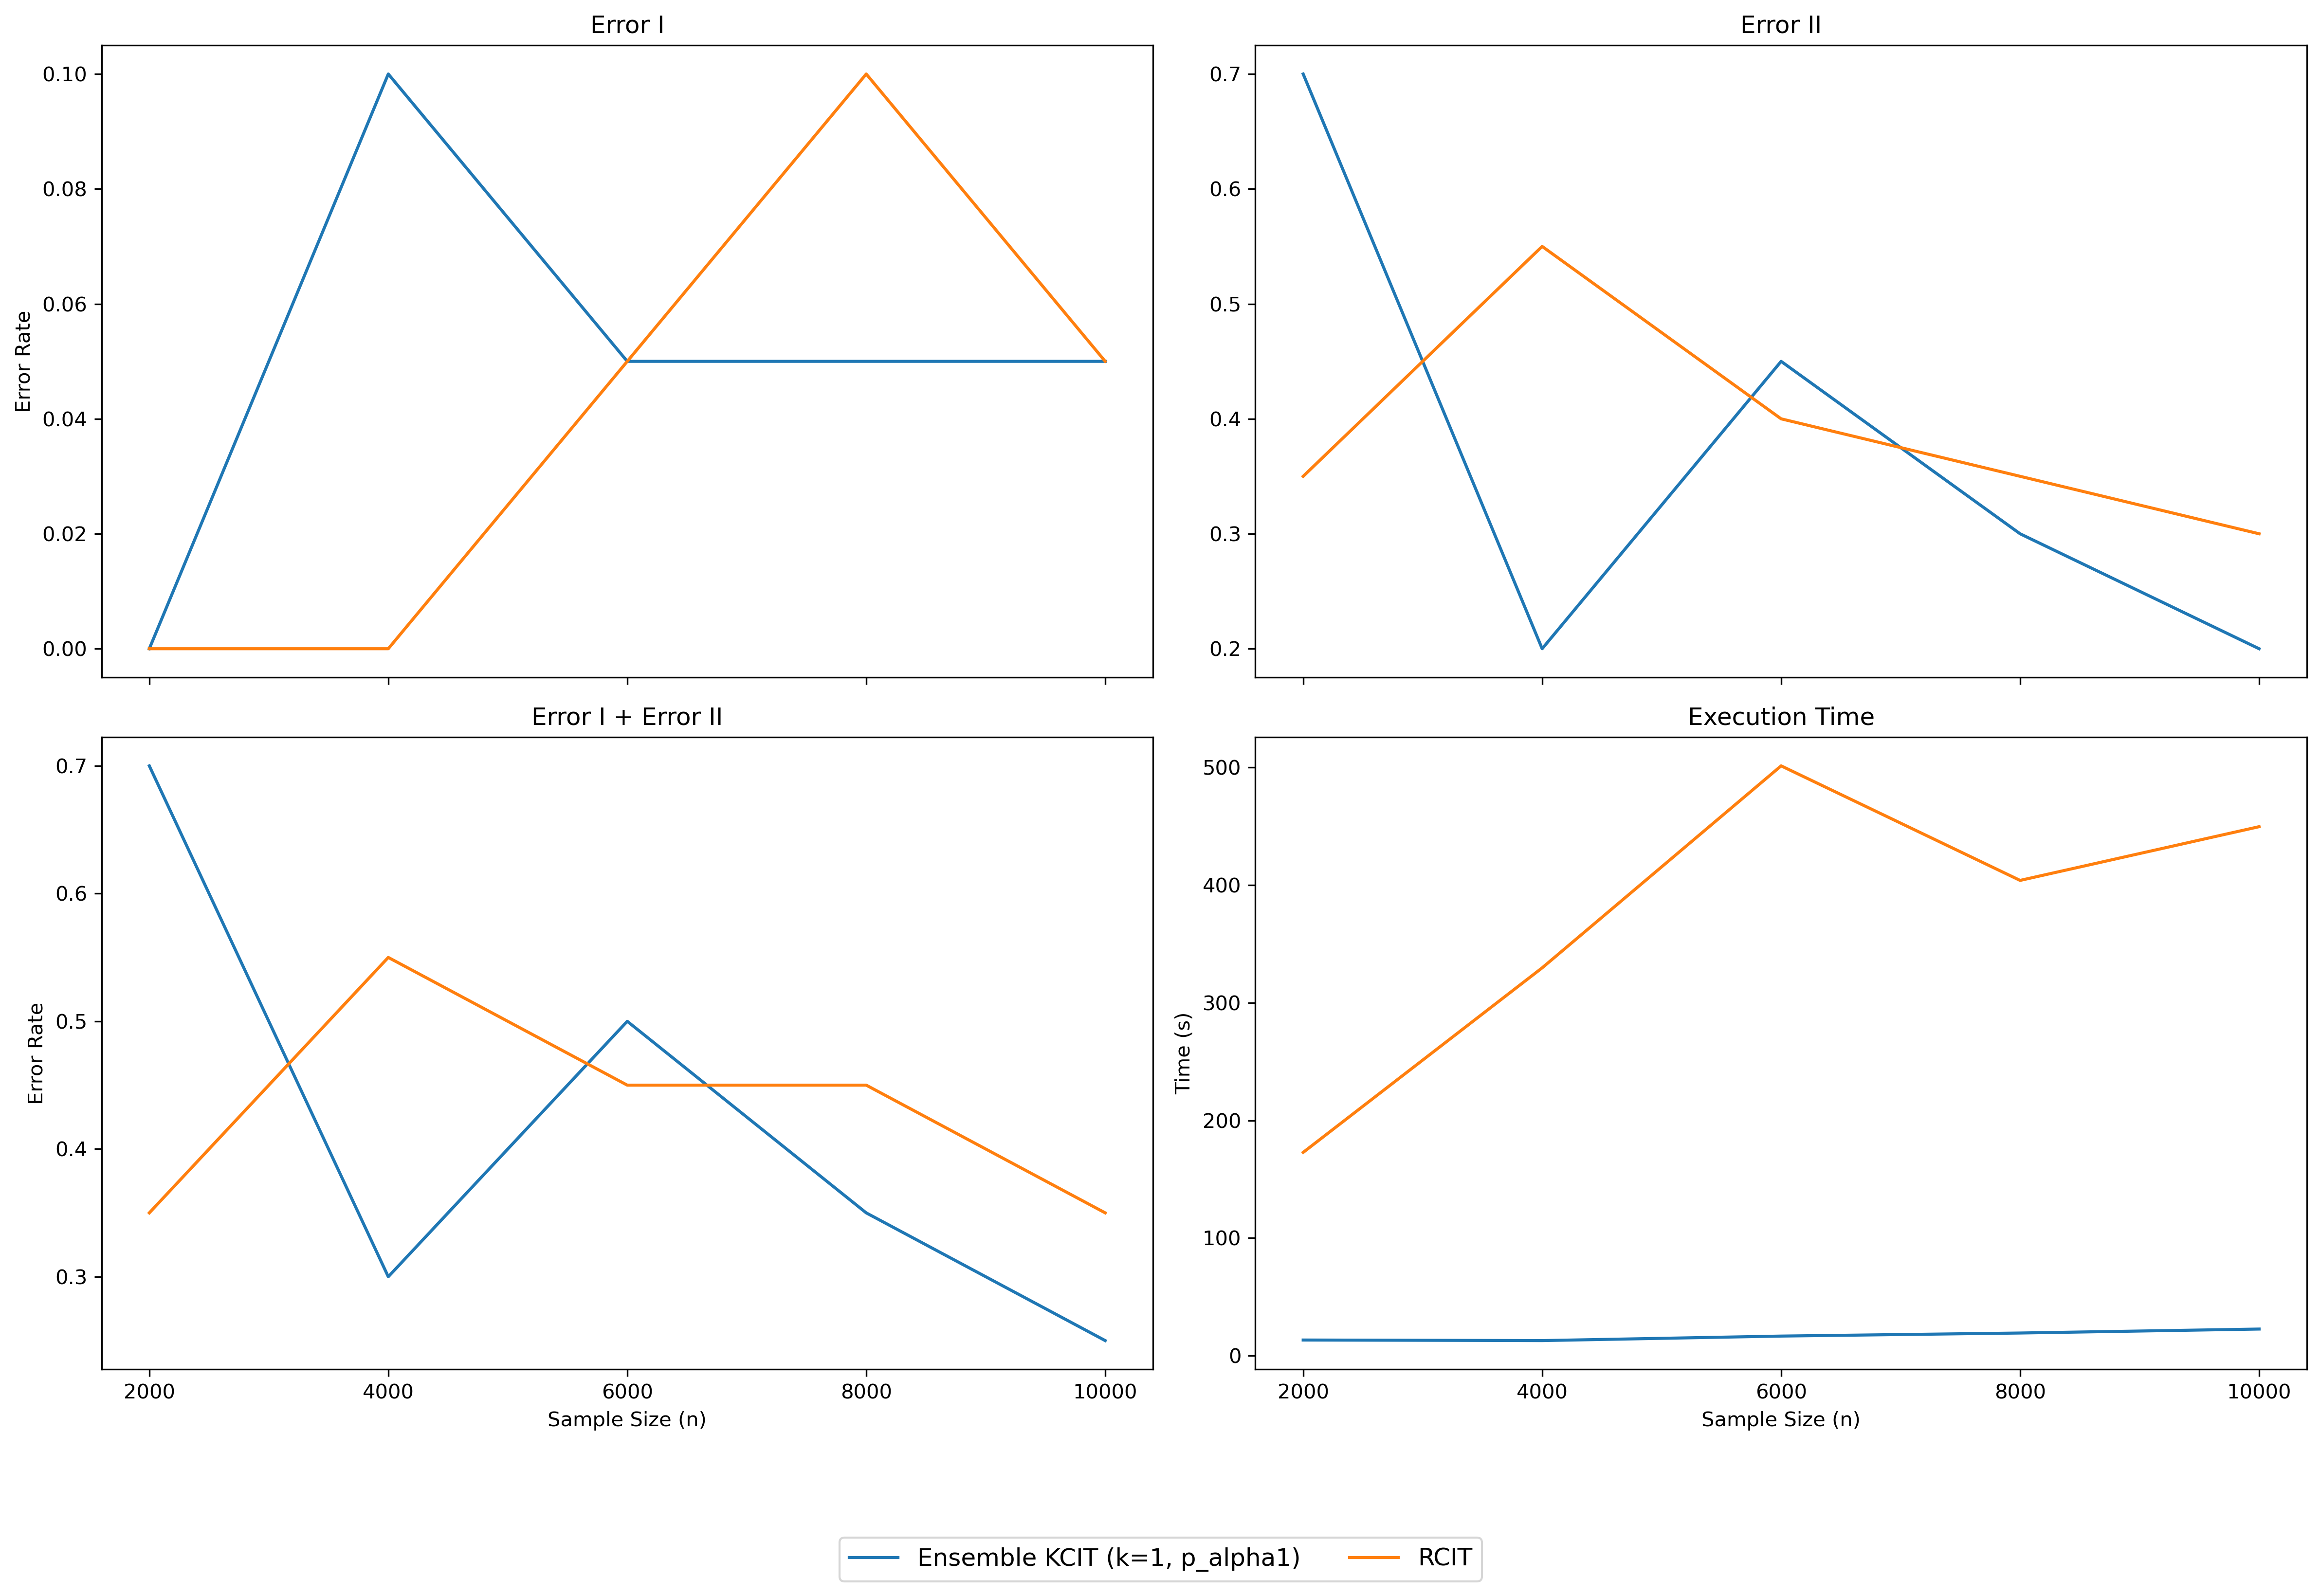

[array([[ 0.        ,  0.1       ,  0.05      ,  0.05      ,  0.05      ],
        [ 0.7       ,  0.2       ,  0.45      ,  0.3       ,  0.2       ],
        [13.42964292, 12.94088697, 16.78165293, 19.37824512, 22.74943495]]),
 array([[0.00000000e+00, 0.00000000e+00, 5.00000000e-02, 1.00000000e-01,
         5.00000000e-02],
        [3.50000000e-01, 5.50000000e-01, 4.00000000e-01, 3.50000000e-01,
         3.00000000e-01],
        [1.72805310e+02, 3.29547354e+02, 5.01119858e+02, 4.03818116e+02,
         4.49448613e+02]])]

In [7]:
ensembles = [(p_alpha1,1), (p_alpha175,400)]

n_list = [2000, 4000, 6000, 8000, 10000]

results = ecit_simu_speed(n_list, t=20, cit=kcit, ensembles=ensembles, show_progress=True)

show_results(results, ensembles, n_list)
results

RCIT (k=1)


t=40000: 100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


Ensemble (k=400, p_alpha175)


t=40000: 100%|██████████| 20/20 [14:42<00:00, 44.11s/it]


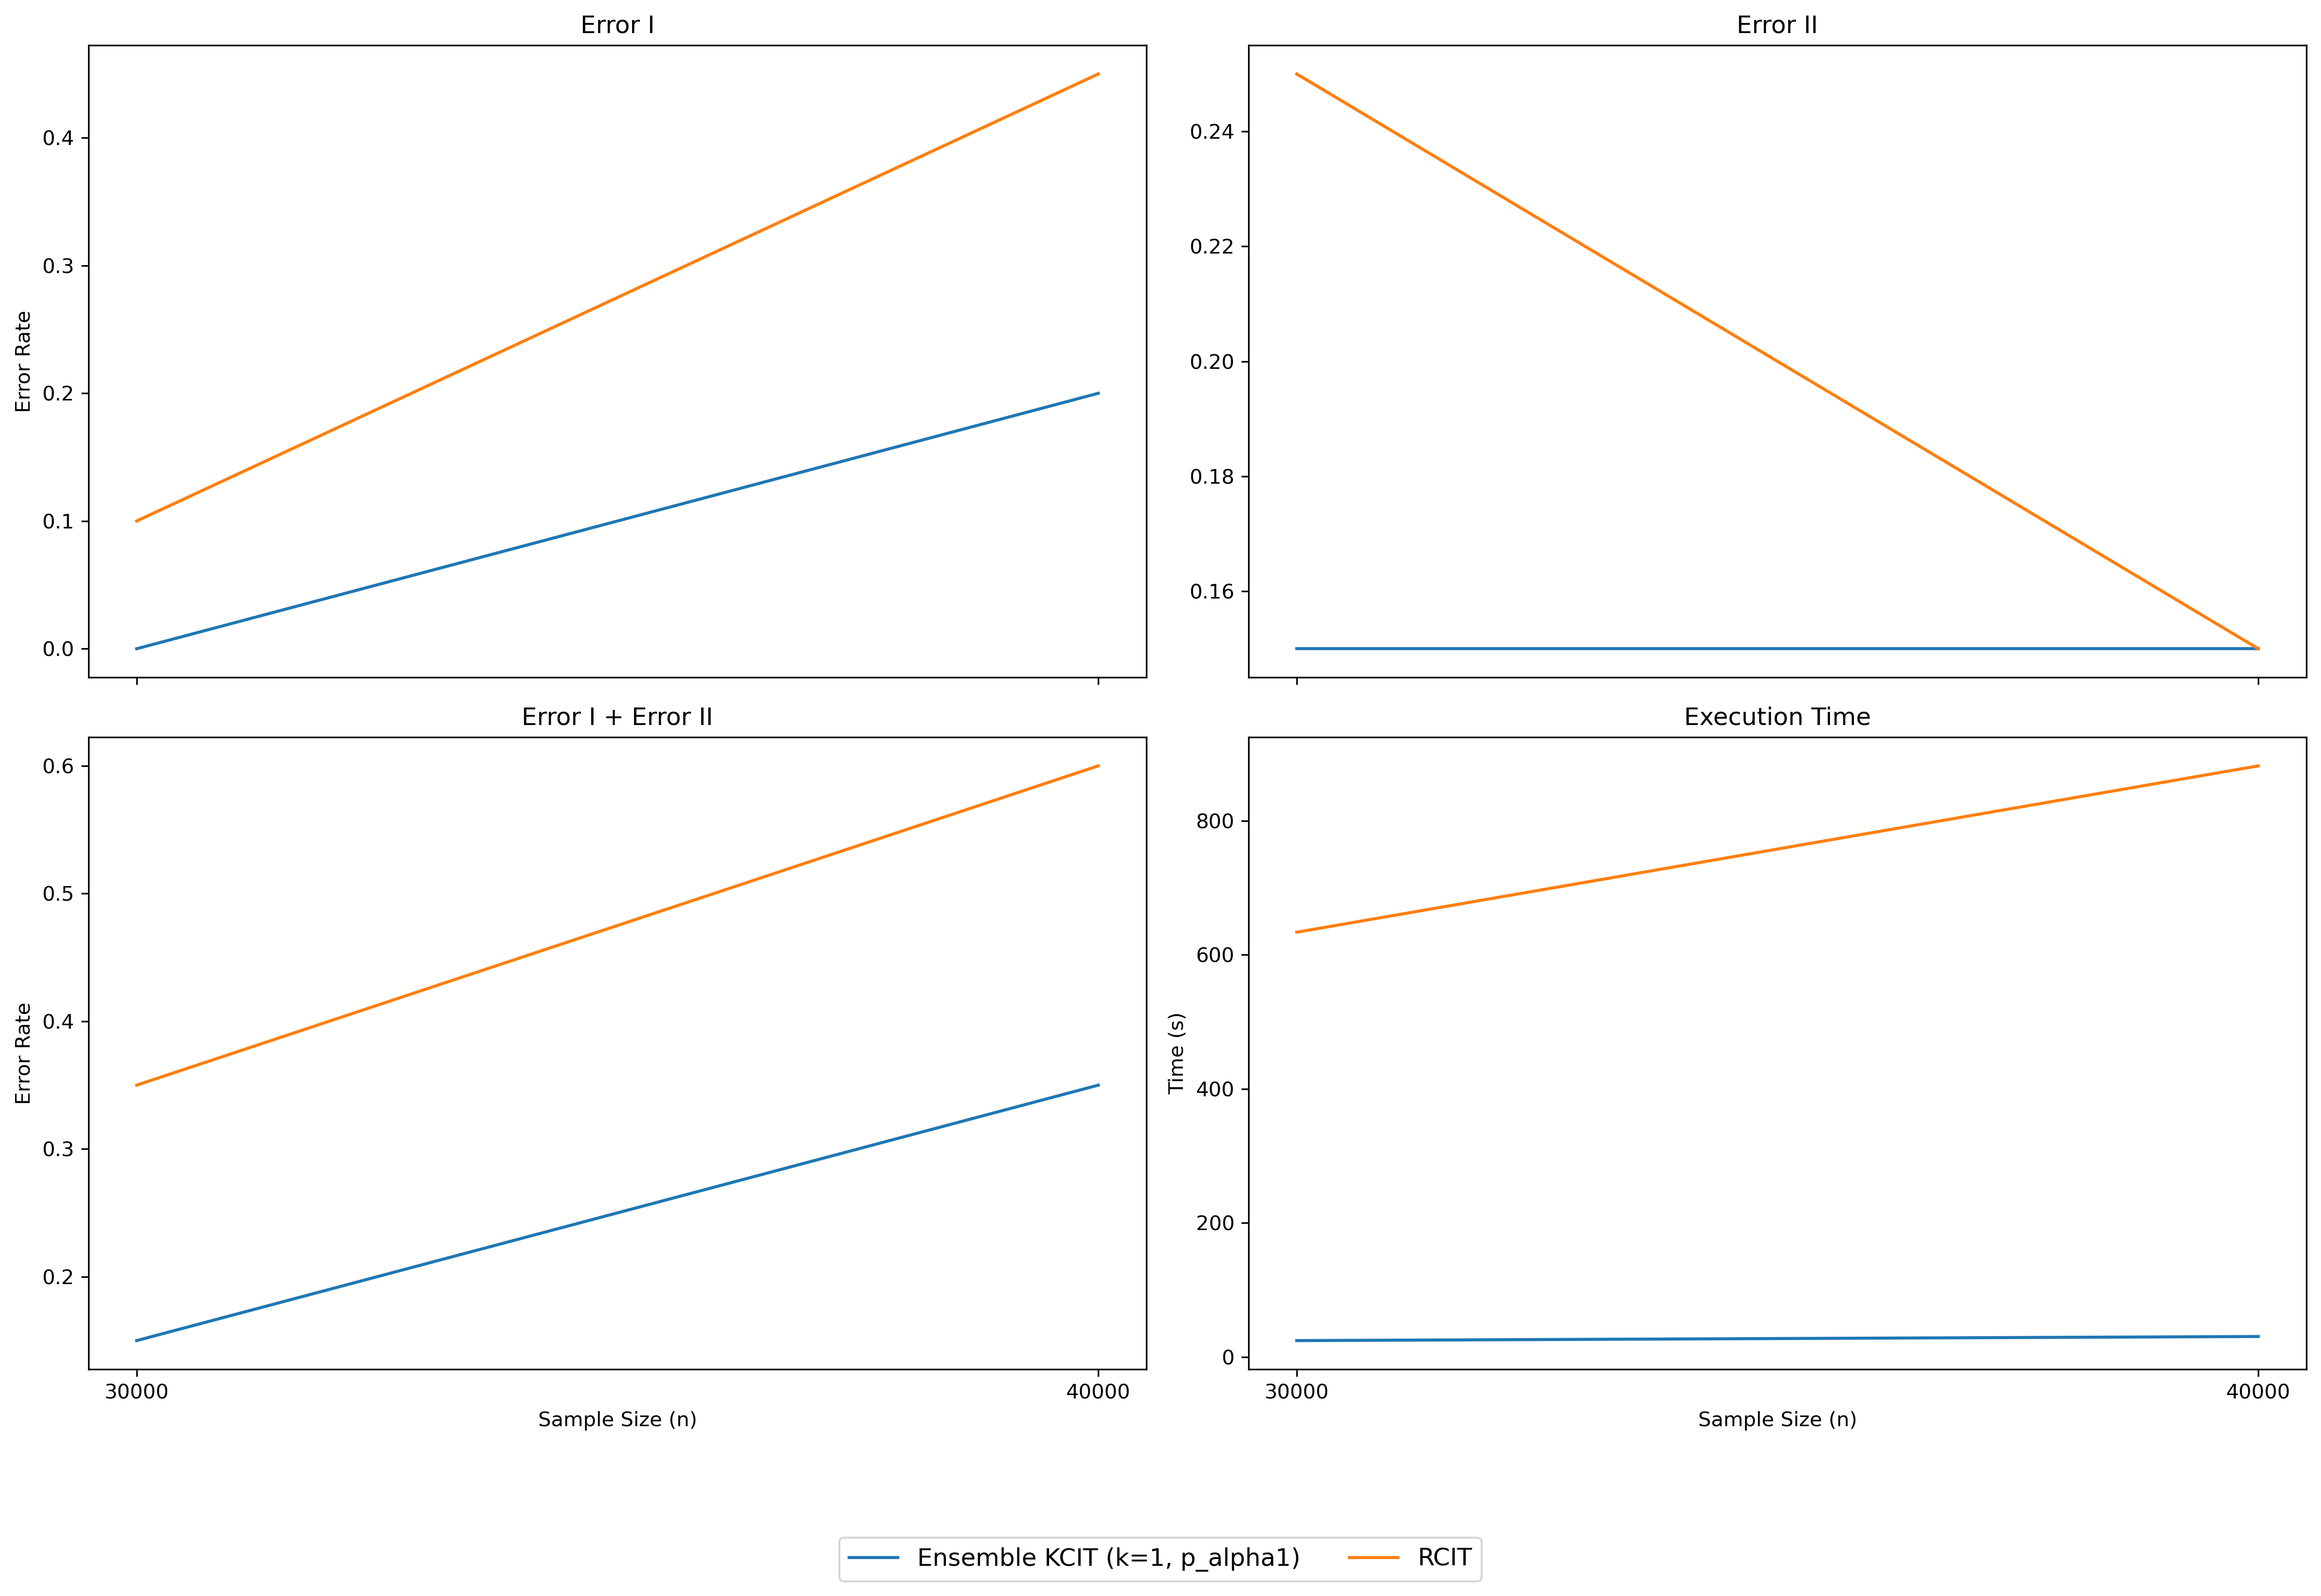

[array([[ 0.        ,  0.2       ],
        [ 0.15      ,  0.15      ],
        [24.36397076, 30.46587801]]),
 array([[1.00000000e-01, 4.50000000e-01],
        [2.50000000e-01, 1.50000000e-01],
        [6.33878041e+02, 8.82170459e+02]])]

In [9]:
ensembles = [(p_alpha1,1), (p_alpha175,400)]

n_list = [30000, 40000]

results = ecit_simu_speed(n_list, t=20, cit=kcit, ensembles=ensembles, show_progress=True)

show_results(results, ensembles, n_list)
results

---

In [21]:
ensembles = [(p_alpha1,1), (p_alpha1,400)]

n_list = [2000, 4000, 6000, 8000, 12000, 16000, 20000]

results = ecit_simu_speed(n_list, t=500, cit=kcit, ensembles=ensembles, show_progress=True)
results

RCIT (k=1)


t=20000: 100%|██████████| 500/500 [07:09<00:00,  1.16it/s]


Ensemble (k=400, p_alpha1)


t=20000: 100%|██████████| 500/500 [2:17:08<00:00, 16.46s/it]  


[array([[7.20000000e-02, 5.80000000e-02, 6.40000000e-02, 1.12000000e-01,
         1.28000000e-01, 1.26000000e-01, 1.70000000e-01],
        [3.84000000e-01, 2.84000000e-01, 2.38000000e-01, 2.08000000e-01,
         2.22000000e-01, 1.70000000e-01, 1.56000000e-01],
        [1.57196881e+02, 1.86142531e+02, 2.19132671e+02, 2.57484455e+02,
         3.18289187e+02, 3.74588889e+02, 4.29397304e+02]]),
 array([[5.80000000e-02, 6.00000000e-02, 7.20000000e-02, 6.20000000e-02,
         9.20000000e-02, 7.80000000e-02, 7.40000000e-02],
        [4.56000000e-01, 4.12000000e-01, 3.80000000e-01, 3.94000000e-01,
         3.64000000e-01, 3.40000000e-01, 3.18000000e-01],
        [8.23384861e+02, 1.65291659e+03, 2.48163793e+03, 3.28396279e+03,
         4.91991679e+03, 6.56080209e+03, 8.22893446e+03]])]

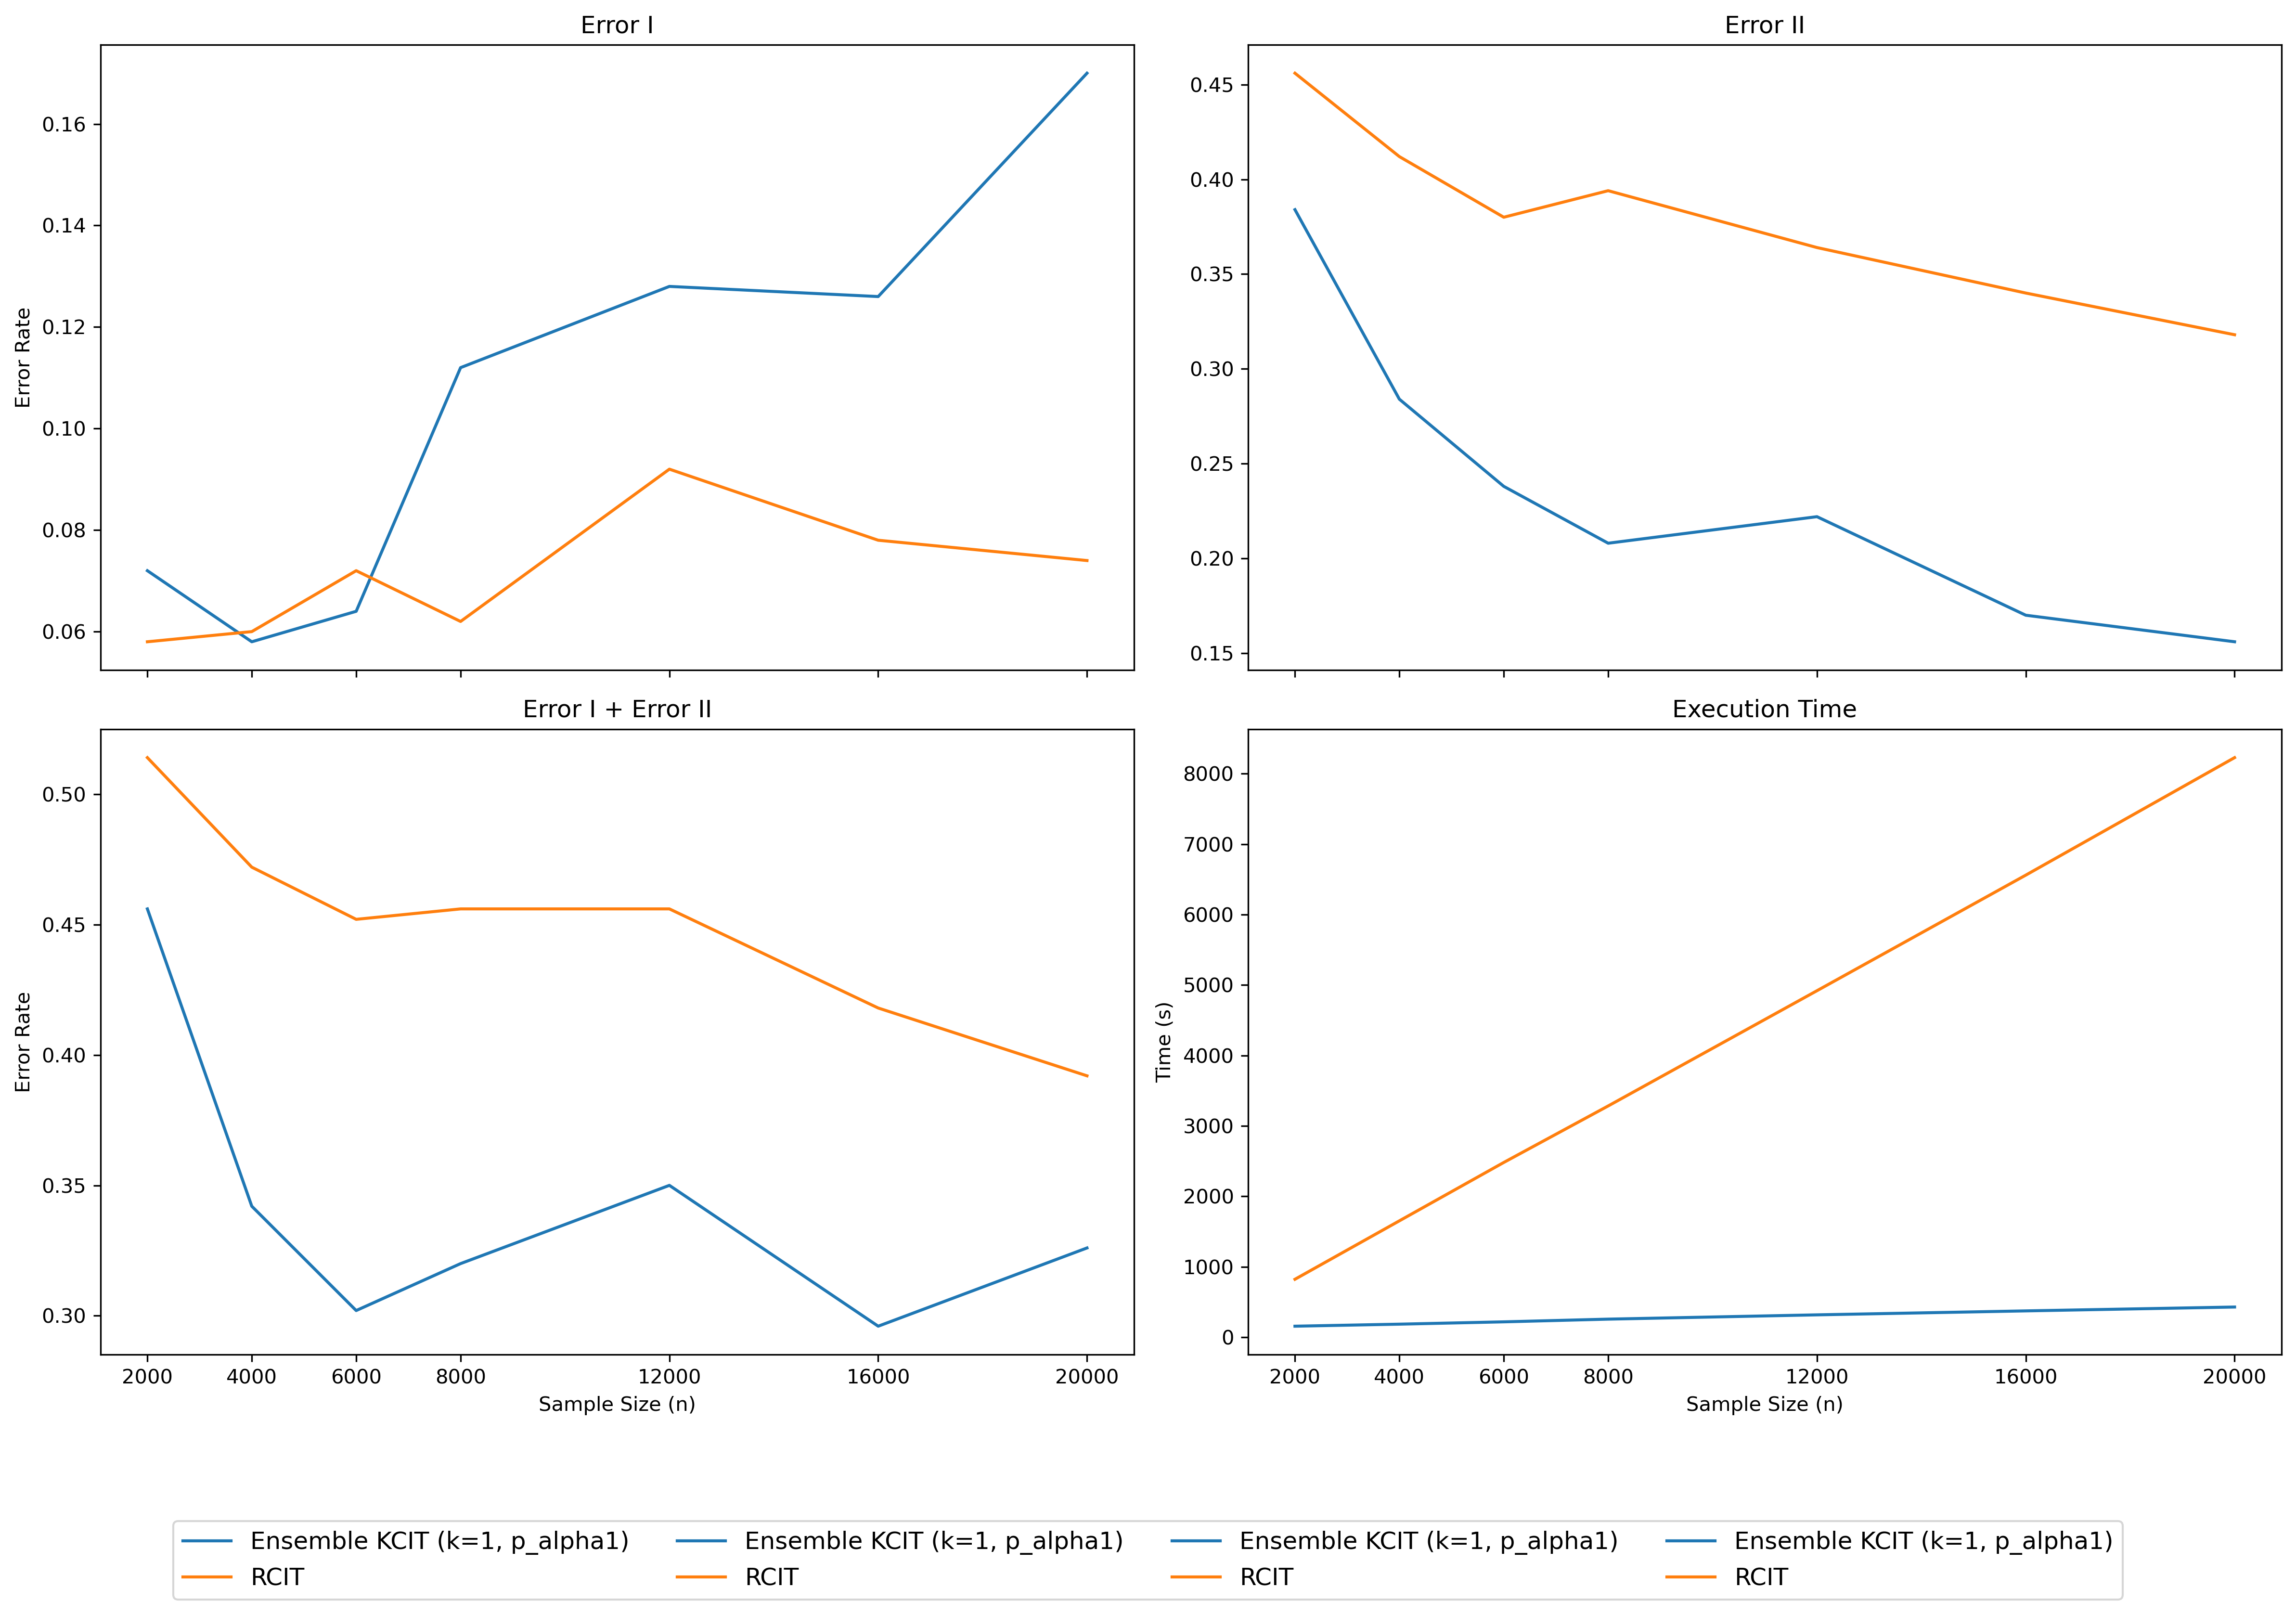

In [22]:
show_results(results, ensembles, n_list)

In [ ]:
ensembles = [(p_alpha1,0)]

n_list = [2000, 4000, 6000]

results = ecit_simu_speed(n_list, t=100, cit=kcit, ensembles=ensembles, show_progress=True)
results